In [1]:
import pandas as pd

In [2]:
data=pd.read_csv("f:Restaurant_Reviews.tsv",delimiter='\t')

In [3]:
data.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [4]:
#removing irrelavant characters
#converting them into the common pattern
#removing stop words
#applying steming lemmatization 
#extract the new data and save it into the same position
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [5]:
ps=PorterStemmer()
for i in data.index:
    dipayan=[]
    temp=re.sub('[^a-z A-Z]','',data['Review'][i])
    temp=temp.lower()
    val=temp.split()
    for j in val:
        if j not in stopwords.words('english'):
            dipayan.append(ps.stem(j))
    nitin=' '.join(dipayan)
    data['Review'][i]=nitin

C:\Users\Abhishek Yadav\Anaconda3\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [6]:
for i in data.index:
    temp=re.sub("[^a-z A-Z]",'',data['Review'][i]).lower()
    temp=temp.split()
    val=[ps.stem(i) for i in temp if not i in stopwords.words('english')]
    val=' '.join(val)
    data['Review'][i]=val

C:\Users\Abhishek Yadav\Anaconda3\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [7]:
data


,Review,Liked
0,wow love place,1
1,crust good,0
2,tasti textur nasti,0
3,stop late may bank holiday rick steve recommen...,1
4,select menu great price,1
...,...,...
995,think food flavor textur lack,0
996,appetit instantli gone,0
997,over impress would go back,0
998,whole experi underwhelm think well go ninja su...,0


In [20]:
data.shape

(1000, 2)

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


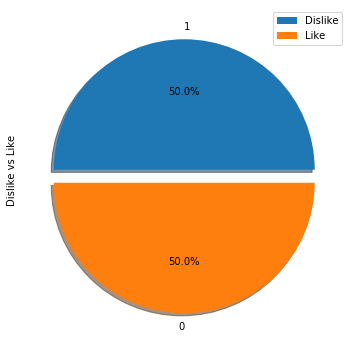

In [24]:
import matplotlib.pyplot as plt
data["Liked"].value_counts().plot(kind = 'pie', explode = [0, 0.1], figsize = (6, 6), autopct = '%1.1f%%', shadow = True)
plt.ylabel("Dislike vs Like")
plt.legend(["Dislike", "Like"])
plt.show()

In [8]:
x=data['Review']
y=data['Liked']

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tv=TfidfVectorizer(max_features=1000)
x=tv.fit_transform(x).toarray()

In [ ]:
pd.DataFrame(x)

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=1000)


In [10]:
x=cv.fit_transform(x).toarray()

In [11]:
pd.DataFrame(x)

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20)

In [ ]:
from sklearn.ensemble import RandomForestClassifier 
model = RandomForestClassifier(n_estimators = 501, 
                            criterion = 'entropy')
model.fit(xtrain, ytrain)  

In [15]:
from sklearn.naive_bayes import MultinomialNB
model=MultinomialNB()

In [16]:
model.fit(xtrain,ytrain)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [17]:
ypred=model.predict(xtest)

In [18]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest,ypred)

0.84

In [19]:
# Making the Confusion Matrix 
from sklearn.metrics import confusion_matrix 

cm = confusion_matrix(ytest, ypred) 

cm 


array([[85, 17],
       [15, 83]], dtype=int64)

In [ ]:
# Finding precision and recall
from sklearn.metrics import precision_score, recall_score
precision_score(ytest, ypred)
recall_score(ytest, ypred)


In [ ]:
val='This Food was bad :)'

In [ ]:
temp=re.sub("[^a-z A-Z]",'',val)

In [ ]:
temp=temp.lower()

In [ ]:
temp=temp.split()

In [ ]:
temp

In [ ]:
nitin=[]
for i in temp:
    if i not in stopwords.words('english'):
        nitin.append(ps.stem(i))

In [ ]:
nitin=' '.join(nitin)

In [ ]:
nitin

In [ ]:
testdata=cv.transform([nitin]).toarray()

In [ ]:
model.predict(testdata)

In [ ]:
# Making the Confusion Matrix 
from sklearn.metrics import confusion_matrix 

cm = confusion_matrix(y_test, y_pred) 

cm 


In [ ]:
# Importing Libraries 
import numpy as np   
import pandas as pd  
  
# Import dataset 
dataset = pd.read_csv('Restaurant_Reviews.tsv', delimiter = '\t')

In [ ]:
# library to clean data 
import re 

# Natural Language Tool Kit 
import nltk 

nltk.download('stopwords') 

# to remove stopword 
from nltk.corpus import stopwords 

# for Stemming propose 
from nltk.stem.porter import PorterStemmer 

# Initialize empty array 
# to append clean text 
corpus = [] 

# 1000 (reviews) rows to clean 
for i in range(0, 1000): 
	
	# column : "Review", row ith 
	review = re.sub('[^a-zA-Z]', ' ', dataset['Review'][i]) 
	
	# convert all cases to lower cases 
	review = review.lower() 
	
	# split to array(default delimiter is " ") 
	review = review.split() 
	
	# creating PorterStemmer object to 
	# take main stem of each word 
	ps = PorterStemmer() 
	
	# loop for stemming each word 
	# in string array at ith row	 
	review = [ps.stem(word) for word in review 
				if not word in set(stopwords.words('english'))] 
				
	# rejoin all string array elements 
	# to create back into a string 
	review = ' '.join(review) 
	
	# append each string to create 
	# array of clean text 
	corpus.append(review) 


In [ ]:
# Creating the Bag of Words model 
from sklearn.feature_extraction.text import CountVectorizer 

# To extract max 1000 feature. 
# "max_features" is attribute to 
# experiment with to get better results 
cv = CountVectorizer(max_features = 1000) 

# X contains corpus (dependent variable) 
X = cv.fit_transform(corpus).toarray() 

# y contains answers if review 
# is positive or negative 
y = dataset.iloc[:, 1].values 


In [ ]:
# Splitting the dataset into 
# the Training set and Test set 
from sklearn.cross_validation import train_test_split 

# experiment with "test_size" 
# to get better results 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20) 


In [ ]:
# Fitting naive bayes Classification 
# to the Training set 
from sklearn.naive_bayes import MultinomialNB 

# n_estimators can be said as number of 
# to get better results 
model=MultinomialNB() 
							
model.fit(X_train, y_train) 


In [ ]:
# Predicting the Test set results 
y_pred = model.predict(X_test) 

y_pred 
